<a href="https://colab.research.google.com/github/Jatin-Prakash/Deep-Learning/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as pyplt

In [2]:
(train_image,train_lable),(test_image,test_lable) = datasets.cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


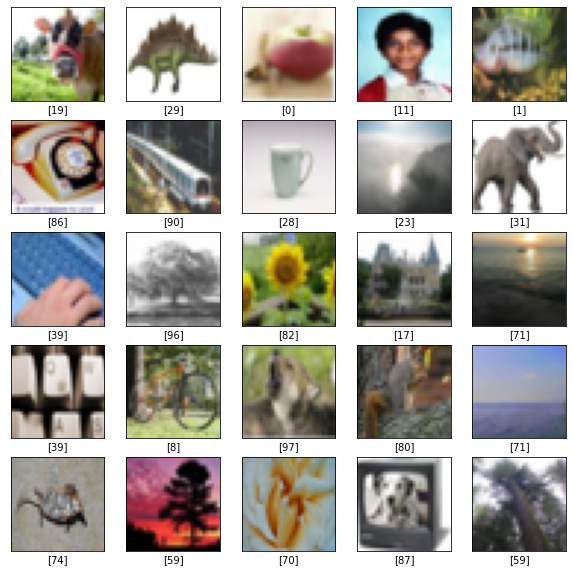

In [3]:
pyplt.figure(figsize=(10,10))
for i in range(25):
    pyplt.subplot(5,5,i+1)
    pyplt.xticks([])
    pyplt.yticks([])
    pyplt.imshow(train_image[i])
    pyplt.xlabel(train_lable[i])

pyplt.show()

In [4]:
model = models.Sequential()

In [5]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
layers.Dropout(0.5)
model.add(BatchNormalization())
model.add(layers.MaxPool2D(2,2))

#Layer 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
layers.Dropout(0.5)
model.add(BatchNormalization())
model.add(layers.MaxPool2D(2,2))

#Layer 3, this would not have any pooling as its last layer and will be connected to fully connected layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.5)
model.add(BatchNormalization())
model.add(layers.Dense(100))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [10]:
model.fit(train_image,train_lable, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 25s 9ms/step - loss: 3.5070 - accuracy: 0.1816
Epoch 2/30
1563/1563 [==============================] - 13s 9ms/step - loss: 2.6839 - accuracy: 0.3250
Epoch 3/30
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3722 - accuracy: 0.3908
Epoch 4/30
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1732 - accuracy: 0.4338
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0298 - accuracy: 0.4650
Epoch 6/30
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9147 - accuracy: 0.4890
Epoch 7/30
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8090 - accuracy: 0.5097
Epoch 8/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7198 - accuracy: 0.5317
Epoch 9/30
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6371 - accuracy: 0.5486
Epoch 10/30
1563/1563 [==============================] - 15s 9ms/step

In [11]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
test_loss, test_acc = model.evaluate(test_image,test_lable,verbose=2)

313/313 - 2s - loss: 3.4882 - accuracy: 0.3740 - 2s/epoch - 6ms/step


In [13]:
probablity = prediction_model.predict(test_image)
probablity

array([[3.6679739e-09, 1.0567499e-06, 3.5418319e-03, ..., 1.6388769e-06,
        5.7493300e-05, 1.0658262e-03],
       [1.8098674e-06, 2.0276271e-07, 1.0471114e-04, ..., 1.1115792e-01,
        1.6456525e-04, 9.5871819e-06],
       [1.9295647e-10, 4.5085390e-06, 7.0320442e-03, ..., 1.1400247e-05,
        1.0484733e-04, 2.2753889e-05],
       ...,
       [1.0698272e-03, 2.1456013e-07, 1.0079188e-07, ..., 2.0392497e-06,
        8.6728420e-08, 5.9921689e-02],
       [9.0381695e-11, 1.7302876e-10, 2.2995698e-04, ..., 3.3570343e-04,
        1.2188400e-05, 4.6215628e-04],
       [1.8773312e-04, 5.0420635e-03, 7.3987227e-05, ..., 1.2916626e-08,
        5.0937076e-04, 6.4452179e-03]], dtype=float32)

In [16]:
import numpy as np
np.argmax(probablity[1])

80

In [17]:
test_lable[1]

array([33])